## 1- Descarga el dataset

Leelo

https://drive.google.com/file/d/1xpCTBsa2rgq5W2i2h42kFGqQxhVrN5Q1/view?usp=sharing


In [59]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/nba.csv")

In [3]:
df.head()

,Unnamed: 0,season,poss,mp,do_ratio,pacing,win_rating
0,0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,1,2017,5582,2708,0.996587,0.531888,10.808427
2,2,2016,4976,2407,0.242598,0.127976,3.054773
3,3,2021,1178,585,-1.343806,-1.201034,0.230004
4,4,1988,4534,2056,-1.813990,-0.128997,0.905614


## 2- Elegi el target y la variable
(`win_rating`) en función de los minutos jugados (`mp`)

Asigne esas dos variables a `X` e `y`. Recuerde que `X` es la(s) característica(s), y `y` el objetivo.

In [4]:
nba_data = df[["mp", "win_rating"]]

nba_data.head()

,mp,win_rating
0,2409,1.643091
1,2708,10.808427
2,2407,3.054773
3,585,0.230004
4,2056,0.905614


## 3- Graficar
En un diagrama de dispersión o scatterplot ([doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualice la relación entre la calificación y los minutos jugados.

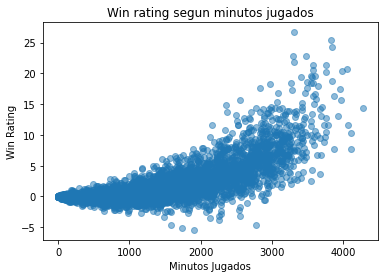

In [5]:
import matplotlib.pyplot as plt

# leer la documentacion y reemplazar por metodos correctos
plt.scatter(df["mp"], df["win_rating"], alpha=0.5)
plt.title('Win rating segun minutos jugados')
plt.xlabel('Minutos Jugados')
plt.ylabel('Win Rating')
plt.show()

## 3- Calcular metricas

In [6]:
from metricas_lineal import RMSLE
from metricas_lineal import MAPE
from metricas_lineal import MAE
from sklearn.preprocessing import StandardScaler

In [10]:
df_stdr = df.copy()
columnas = ["win_rating", "mp"]

for f in columnas:
    mu = df[f].mean()
    sigma = df[f].std()
    df_stdr[f] = df[f].map(lambda x: (x - mu) / sigma)

df_stdr.head()

,Unnamed: 0,season,poss,mp,do_ratio,pacing,win_rating
0,0,1987,4847,1.030394,-1.546275,-0.599918,-0.115675
1,1,2017,5582,1.329770,0.996587,0.531888,2.522762
2,2,2016,4976,1.028392,0.242598,0.127976,0.290707
3,3,2021,1178,-0.795897,-1.343806,-1.201034,-0.522462
4,4,1988,4534,0.676951,-1.813990,-0.128997,-0.327974


In [60]:
X = nba_data[["mp"]]
y = nba_data["win_rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [62]:
model = LinearRegression()

model.fit(X, y)

model.score(X, y)

0.5599048286723916

In [47]:
def regresionfitiada(x):
    return float(model.intercept_ + model.coef_ * x)

import numpy as np
valores_al_azar = pd.DataFrame()
valores_al_azar["minutos_simulados"] = np.linspace(0, 2500, 100)

In [48]:
valores_al_azar["win_rate_predicho"] = valores_al_azar["minutos_simulados"].apply(regresionfitiada)
valores_al_azar

,minutos_simulados,win_rate_predicho
0,0.000000,-1.546375
1,25.252525,-1.480653
2,50.505051,-1.414932
3,75.757576,-1.349210
4,101.010101,-1.283488
...,...,...
95,2398.989899,4.697188
96,2424.242424,4.762910
97,2449.494949,4.828631
98,2474.747475,4.894353


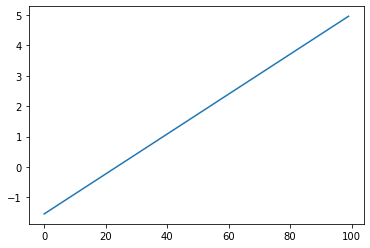

In [49]:
plt.plot(valores_al_azar["win_rate_predicho"])

In [64]:
y_pred = model.predict(X_test)
y_pred

array([ 4.99130587, -0.92696091,  4.23655769, ..., -1.5125414 ,
       -0.28152109,  6.1936978 ])

In [69]:
model.predict([[566]])

C:\Users\agusd\anaconda3\envs\POO\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.07331469])

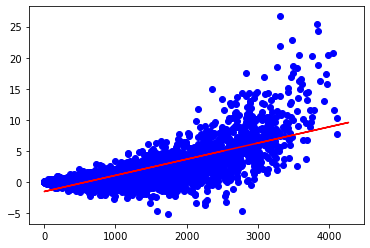

In [71]:
plt.scatter(X_train, y_train, color = "b")
plt.plot(X_test, y_pred, color = "r")
plt.show()

In [75]:
errorrmse = RMSLE(y_train,y_pred)
errorrmse

C:\Facu\POO\clases_teorico\UCEMA_POO\11-recap\metricas_lineal.py:4: RuntimeWarning: invalid value encountered in log
  return np.mean((np.log(1+y_pred) - np.log(1+y_true))**2)**.5
C:\Users\agusd\anaconda3\envs\POO\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: operands could not be broadcast together with shapes (1200,) (2800,) 